In [18]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

In [11]:
df = pd.read_csv('shopping-data.csv')

X = df.iloc[:, [2, 3, 4]].values
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Label Encoding

In [5]:
# Applying Label Encoding to "Genre"
stringCol = df.iloc[:,1]
encoder = LabelEncoder()
encoder.fit(stringCol)
encoder.transform(stringCol)

# Replacing "Genre" values with Encoded Labels
df["Genre"].replace(to_replace=df["Genre"].tolist(), 
                      value=encoder.transform(stringCol),
                      inplace = True)
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [6]:
# Making a crosstab and name the "count" column
df_outcome = pd.crosstab(index=df["Genre"], columns="count") 
df_outcome

col_0,count
Genre,
0,112
1,88


## Data Visualization

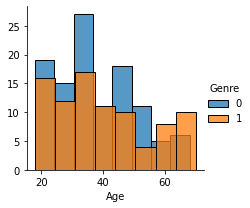

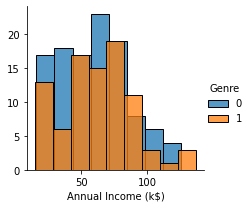

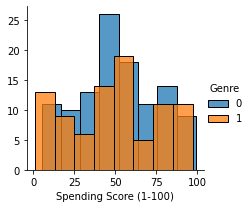

In [7]:
# Frequency distribution of "Genre"
sns.FacetGrid(df, hue="Genre", height=3).map(sns.histplot, "Age").add_legend()
sns.FacetGrid(df, hue="Genre", height=3).map(sns.histplot, "Annual Income (k$)").add_legend()
sns.FacetGrid(df, hue="Genre", height=3).map(sns.histplot, "Spending Score (1-100)").add_legend()
plt.show()

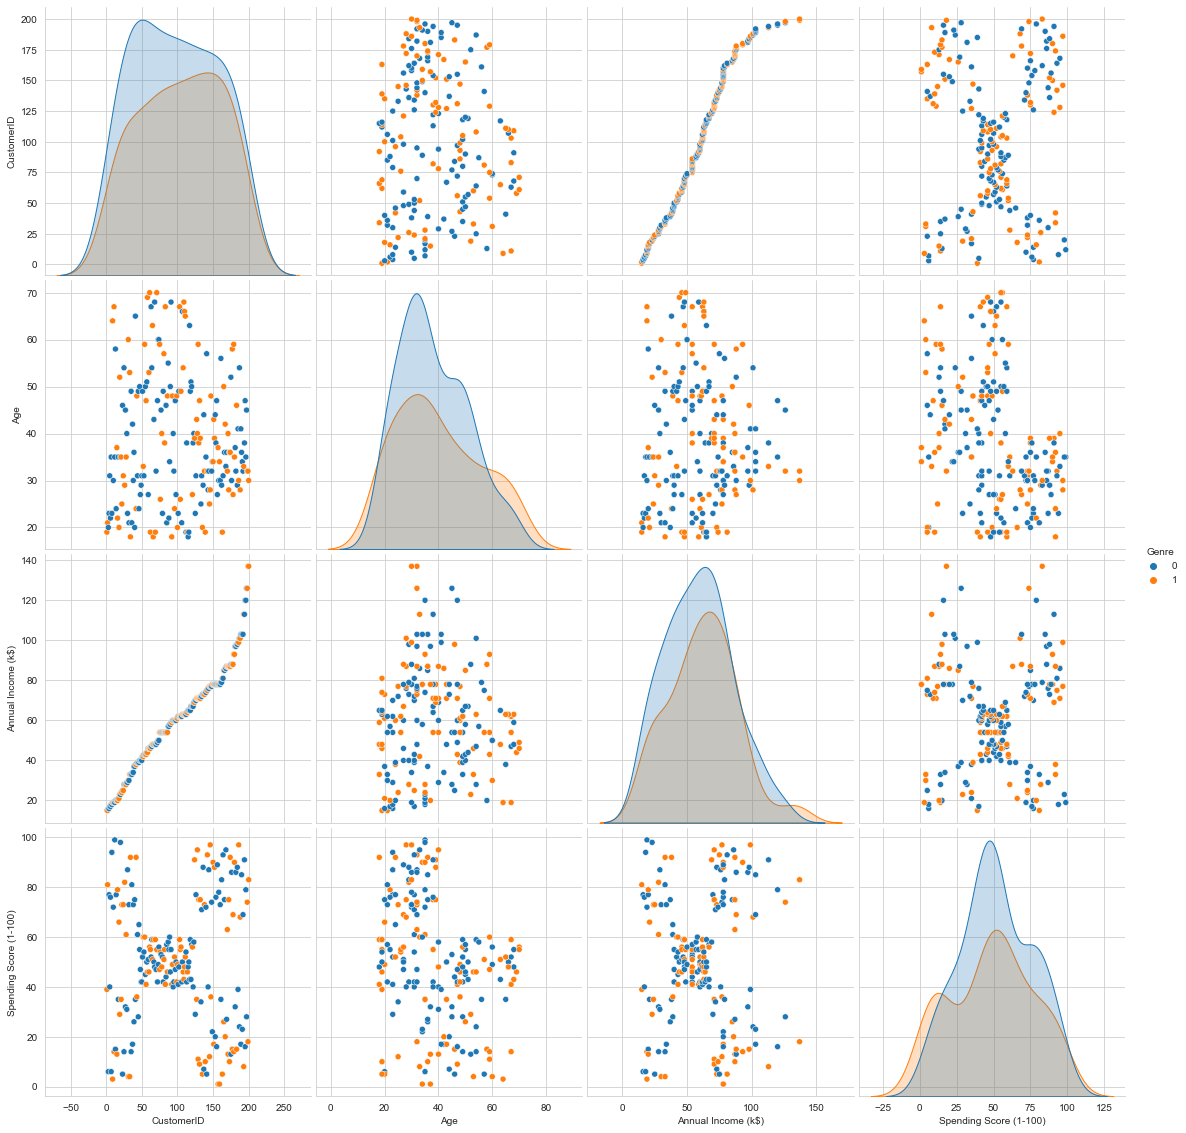

In [8]:
# Scatter plot of features according to "Genre"
sns.set_style("whitegrid")
sns.pairplot(df, hue="Genre", height=4);
plt.show()

## Elbow Method

C:\Users\Haitam\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


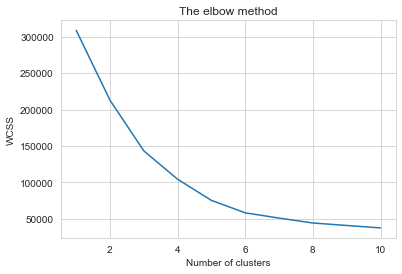

In [12]:
# Determining the optimal number of clusters for K-means clustering with the Elbow Method

# within cluster sum of squares
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

C:\Users\Haitam\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


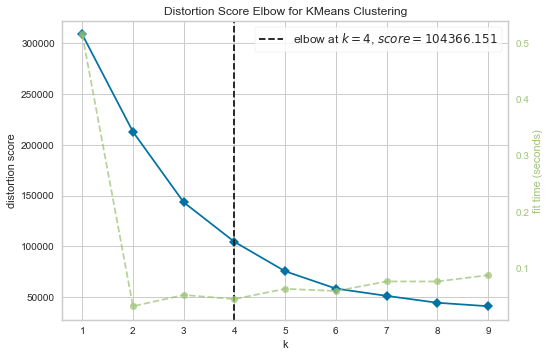

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
# Using ElbowVisualizer
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
# Fit the data to the visualizer
visualizer.fit(X)
# Finalize and render the figure
visualizer.show()

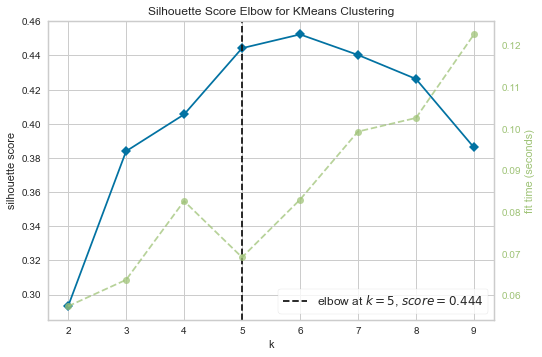

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [17]:
# Silhouette Score for K means using ElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette', timings= True)
# Fit the data to the visualizer
visualizer.fit(X)
# Finalize and render the figure
visualizer.show()

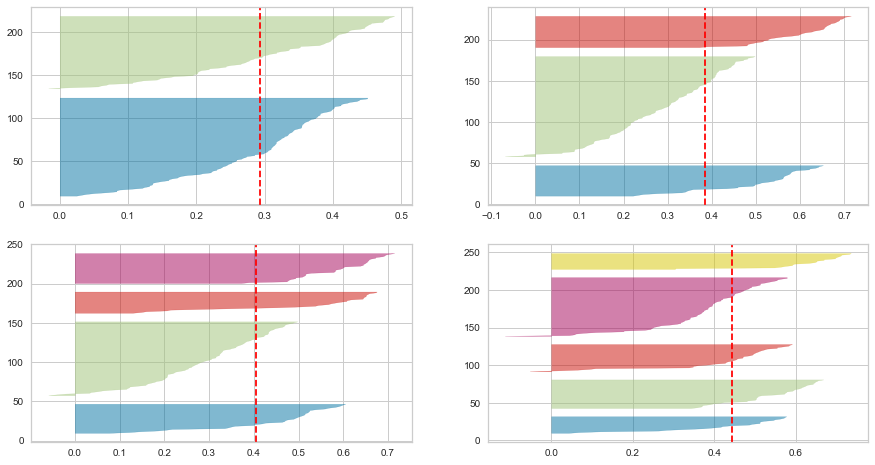

In [19]:
# Silhouette method using SilhouetteVisualizer
fig, ax = plt.subplots(2, 2, figsize=(15,8))

for i in [2, 3, 4, 5]:
    # Creating KMeans instance for different number of clusters
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    # Creating SilhouetteVisualizer instance with KMeans instance
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    # Fitting the visualizer
    visualizer.fit(X)

## K-mean clustering

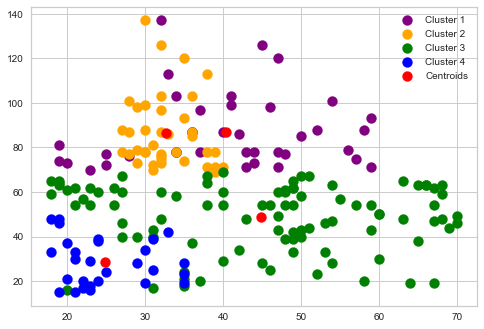

In [21]:
# Number of clusters : 4
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
# Plotting Age and Annual Income (k$)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'blue', label = 'Cluster 4')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()